In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [38]:
data_frame = pd.read_csv('../CCFD/myproject-env/data/creditcard_cleaned.csv')
data_frame.shape[0]

284807

In [4]:
file_path = '~/CCFD/myproject-env/data/creditcard_cleaned.csv'
df = pd.read_csv(file_path, index_col=0)
df.head()

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
v1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, -1.3598071336738 to -0.53341252200504
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v2      284807 non-null  float64
 1   v3      284807 non-null  float64
 2   v4      284807 non-null  float64
 3   v5      284807 non-null  float64
 4   v6      284807 non-null  float64
 5   v7      284807 non-null  float64
 6   v8      284807 non-null  float64
 7   v9      284807 non-null  float64
 8   v10     284807 non-null  float64
 9   v11     284807 non-null  float64
 10  v12     284807 non-null  float64
 11  v13     284807 non-null  float64
 12  v14     284807 non-null  float64
 13  v15     284807 non-null  float64
 14  v16     284807 non-null  float64
 15  v17     284807 non-null  float64
 16  v18     284807 non-null  float64
 17  v19     284807 non-null  float64
 18  v20     284807 non-null  float64
 19  v21     284807 non-null  float64
 20  v22     284807 non-null  fl

<Axes: xlabel='class', ylabel='count'>

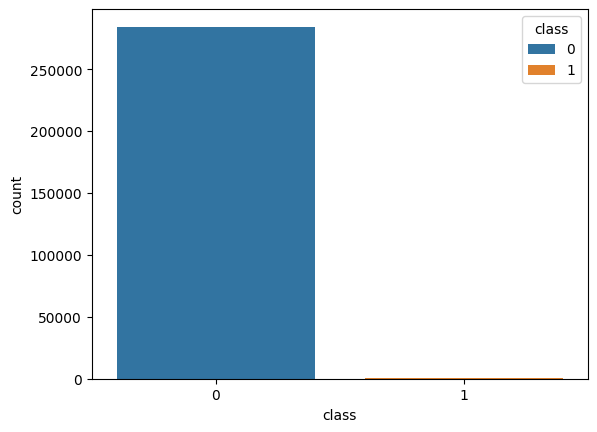

In [6]:
df.dropna(inplace=True)
sns.countplot(data=df, x='class', hue='class')

## Build Random Forest Classifier

In [7]:
df.isnull().sum()

v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [42]:
#Get Target Data
y = df['class']
X = df.drop('class', axis=1)
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create and Train the Model

In [43]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (227845, 28)
X_test: (56962, 28)
y_train: (227845,)
y_test: (56962,)


## Build RandomForest Classifier with Hyper-Parameters

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [45]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [4, 2], 'bootstrap': [True, False]}


In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)

In [47]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs = 4, verbose=2)

In [48]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
conf_mat = confusion_matrix(y_test, rf_pred)
print(conf_mat)

[[56862     2]
 [   22    76]]


In [54]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=1)
scores = cross_val_score(model, X, y, cv=5)
mean_score = scores.mean()
print(f"Mean cross-validation score: {mean_score:.3f}")

Mean cross-validation score: 0.999


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



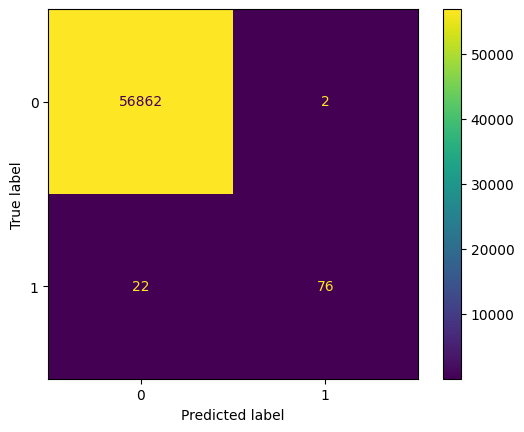

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
print(metrics.classification_report(y_test, rf_pred))
cm = metrics.confusion_matrix(y_test, rf_pred)  
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.show()

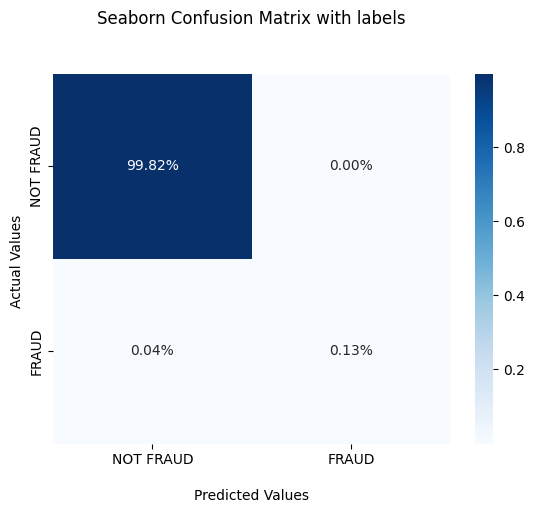

In [50]:
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NOT FRAUD','FRAUD'])
ax.yaxis.set_ticklabels(['NOT FRAUD','FRAUD'])

## Display the visualization of the Confusion Matrix.
plt.show()

<Figure size 800x600 with 0 Axes>

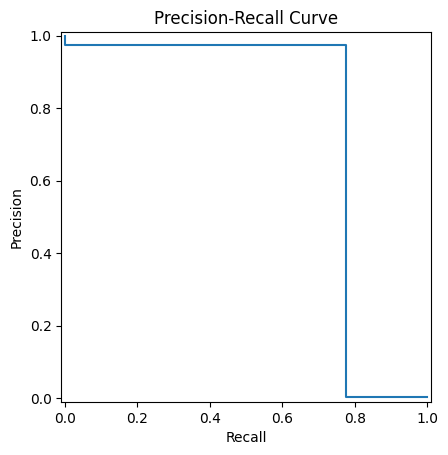

np.float64(0.8751277004172419)

In [51]:
import matplotlib.pyplot as plt

precision, recall, thresholds = metrics.precision_recall_curve(y_test, rf_pred)

plt.figure(figsize=(8,6))
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()

plt.title("Precision-Recall Curve")
plt.show()

metrics.auc(recall, precision)